Accuracy: 55.37329286046435


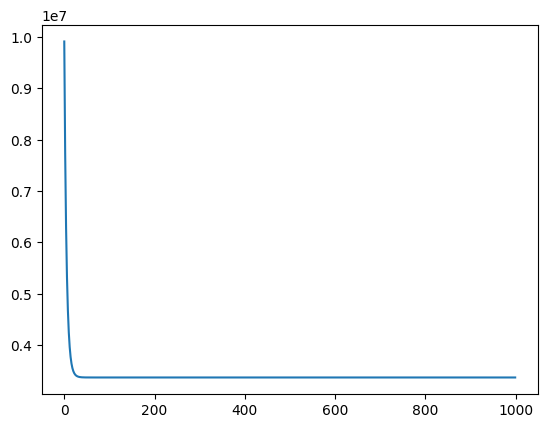

Predictions: 2399.6610708476114 Actual Value: 1375


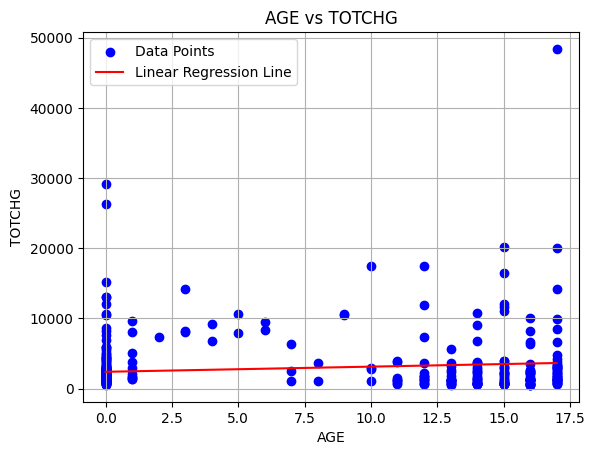

Predictions: 2546.105468749998 Actual Value: 6594


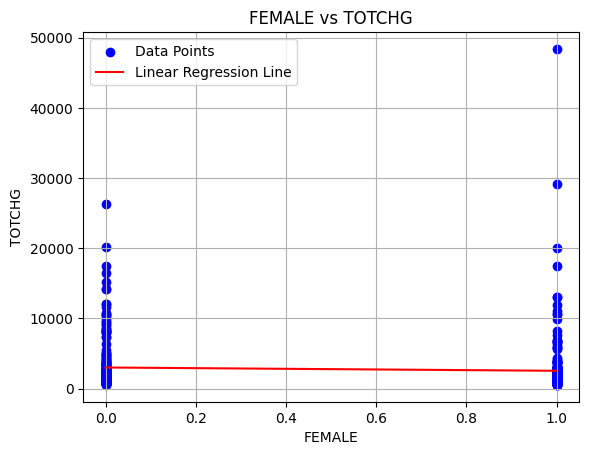

Predictions: 1457.4030476822106 Actual Value: 1760


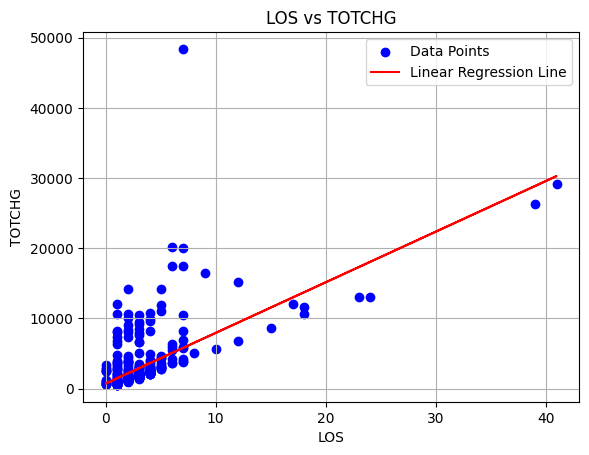

Predictions: 2785.0242804528702 Actual Value: 1368


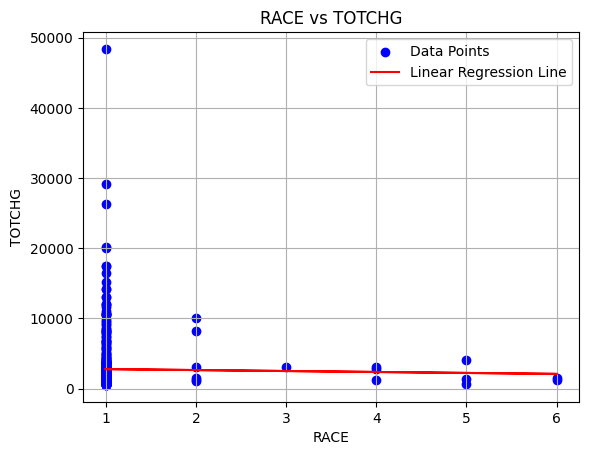

Predictions: 2604.272337564458 Actual Value: 1102


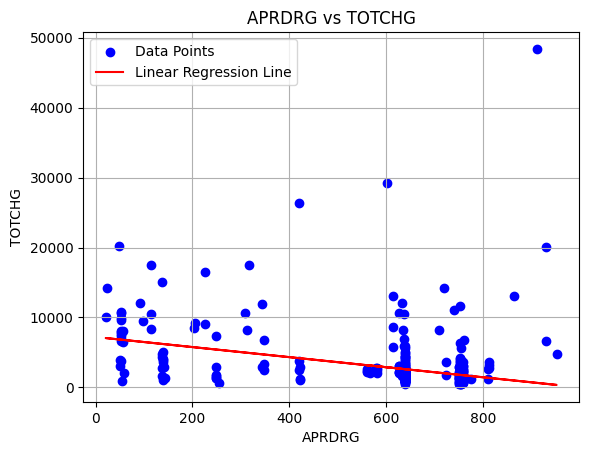

In [2]:
import random as rand
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('C:\\Users\\SOURI\\Desktop\\Robomanipal\\linear_regression_dataset.csv')
data.dropna(inplace=True)
X = data[['AGE', 'FEMALE', 'LOS', 'RACE', 'APRDRG']]
X1=data[['AGE']]
X2=data[['FEMALE']]
X3=data[['LOS']]
X4=data[['RACE']]
X5=data[['APRDRG']]
Y = data['TOTCHG']
iX1='AGE'
iX2='FEMALE'
iX3='LOS'
iX4='RACE'
iX5='APRDRG'

def r2_score(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def PLOT(X,iX,Y,n):
    X = (X - X.mean()) / X.std()
    X.insert(0,"intercept",np.ones(len(X)))

    X = X.values
    Y = Y.values

    def linear_regression(X, Y, learning_rate, iterations):
        m, n = X.shape
        coefficient = np.ones(n)
        cost_function = []

        for iteration in range(iterations):
            gradient = (1 / m) * (X.T @ (X @ coefficient - Y))
            coefficient -= learning_rate * gradient
            cost = (1 / (2 * m)) * np.sum((X @ coefficient - Y) ** 2)
            cost_function.append(cost)

        return coefficient, cost_function

    learning_rate = 0.1
    iterations = 1000

    coefficent, cost_function = linear_regression(X, Y, learning_rate, iterations)

    predictions = X @ coefficent


    if(n>1):
        print("Accuracy:", (r2_score(Y,predictions))*100)
        plt.plot(range(iterations),cost_function)
        plt.show()

    if(n==1):
        num = rand.randrange(500)
        sample_Data=X[num]
        actual_pred=Y[num]
        print("Predictions:",np.dot(sample_Data,coefficent),"Actual Value:",actual_pred)

        #plotting the data and graph
        Xaxis=data[iX]
        plt.scatter(Xaxis, Y, c='b', marker='o', label='Data Points')
        plt.plot(Xaxis, predictions, c='r', label='Linear Regression Line')
        plt.title(iX+' vs TOTCHG')
        plt.xlabel(iX)
        plt.ylabel('TOTCHG')
        plt.legend()
        plt.grid(True)
        plt.show()
PLOT(X,' ',Y,len(X.columns))
PLOT(X1,iX1,Y,len(X1.columns))
PLOT(X2,iX2,Y,len(X2.columns))
PLOT(X3,iX3,Y,len(X3.columns))
PLOT(X4,iX4,Y,len(X4.columns))
PLOT(X5,iX5,Y,len(X5.columns))